<a href="https://colab.research.google.com/github/VinodPungle/skillfytraining/blob/main/MLExample_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Data Collection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/diabetes.csv")

# Output data shape and first few rows
#print("Data Shape:", df.shape)
#print(df.head())
# Show first few rows and dataset info
data_head = df.head()
data_info = df.info()
data_description = df.describe()

# Display outputs
(data_head, data_description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952

In [3]:
# Data Preparation Stage

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

original_shape = df.shape
original_columns = df.columns.tolist()
missing_before = df.isin([0]).sum()

# Replace zero values in clinical columns with NaN and fill with median
clinical_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[clinical_cols] = df[clinical_cols].replace(0, np.nan)
df[clinical_cols] = df[clinical_cols].fillna(df[clinical_cols].median())

missing_after = df.isnull().sum()

# Outputs for data loading and cleaning
print({
    "Missing (0s) Before Cleanup": missing_before[clinical_cols],
    "Missing After Imputation": missing_after[clinical_cols]
})

# Feature Engineering: BMI Category
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["BMI"].apply(categorize_bmi)

# Feature Engineering: Age Group
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 25, 35, 45, 55, 65, 100],
                         labels=["<25", "25-35", "35-45", "45-55", "55-65", "65+"])

# One-hot encode new features
df_encoded = pd.get_dummies(df, columns=["BMI_Category", "Age_Group"], drop_first=True)

# Show the new encoded columns added to the dataset
df_encoded.columns[-10:]

print("\n Encoded \n: ", df_encoded.shape)
print(df.head())

# Separate features and target
X = df_encoded.drop("Outcome", axis=1)
y = df_encoded["Outcome"]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# Output stats
#print("Missing values after cleaning:\n", df.isna().sum())
print("Train data shape:", X_train.shape)
print("Train labels distribution:\n", y_train.value_counts())

{'Missing (0s) Before Cleanup': Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64, 'Missing After Imputation': Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64}

 Encoded 
:  (768, 17)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome BMI_Category Age_Group  
0                     0.627   50        1        Obese     45-55  
1                     0.351   31        0   Overweight     25-35  
2                     0.672   32        1       Normal

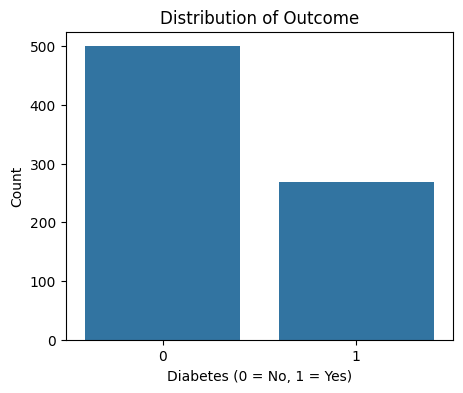

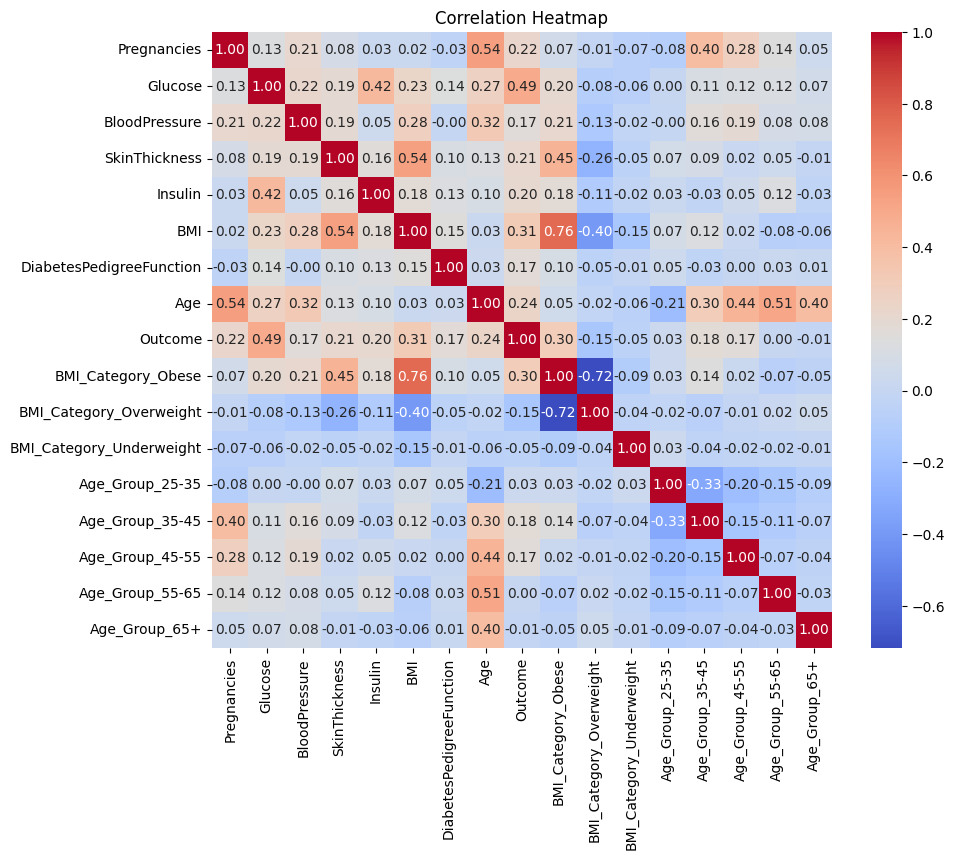

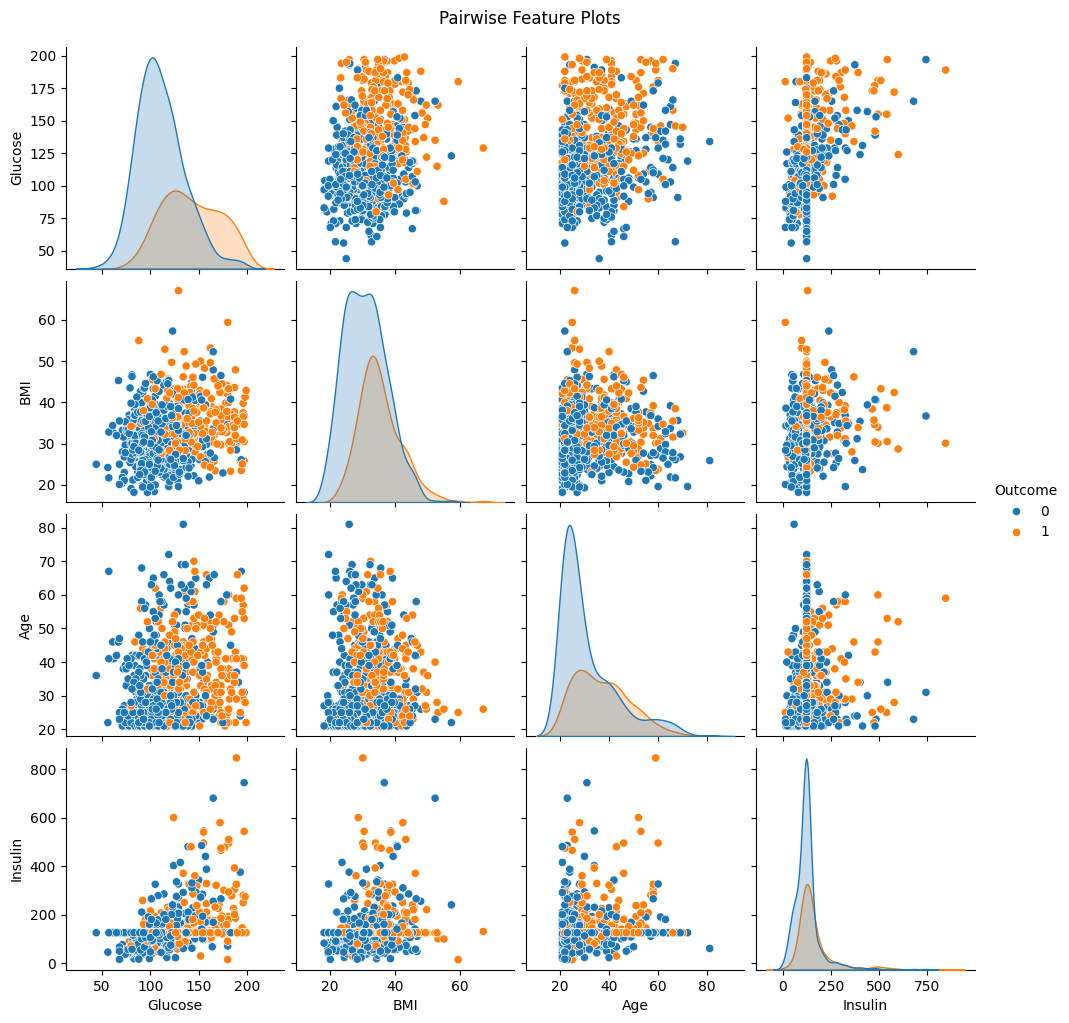

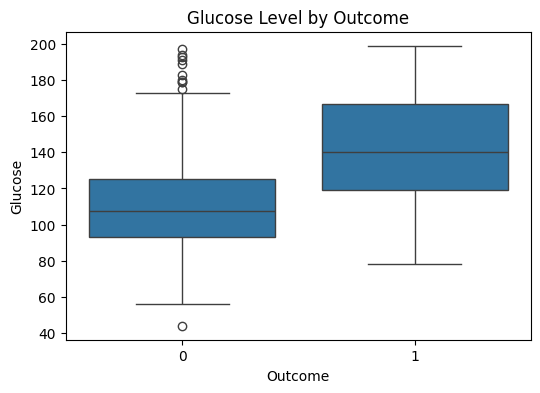

In [4]:
# Exploratory Data Analysis (EDA) with visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Outcome distribution
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Outcome')
plt.title("Distribution of Outcome")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot subset for multivariate relations
sns.pairplot(df[["Glucose", "BMI", "Age", "Insulin", "Outcome"]], hue="Outcome")
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()

# Boxplot of glucose vs outcome
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Outcome", y="Glucose")
plt.title("Glucose Level by Outcome")
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:12:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

XGB ROC AUC Score: 0.8109259259259259
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       100
           1       0.58      0.46      0.52        54

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.69       154

Logistic Regression ROC AUC Score: 0.8325925925925926
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57  

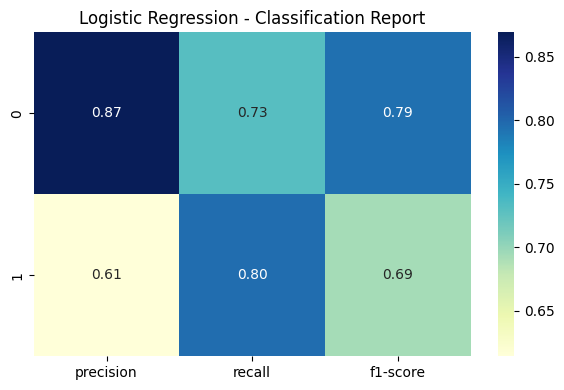

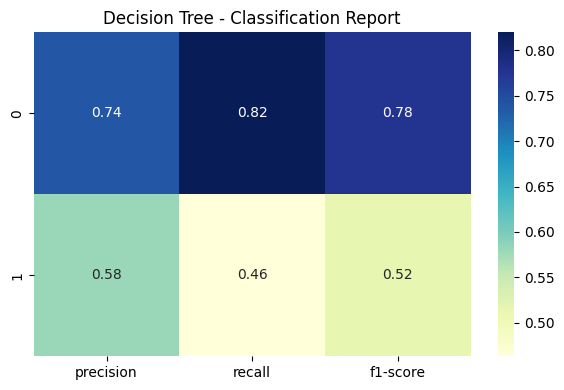

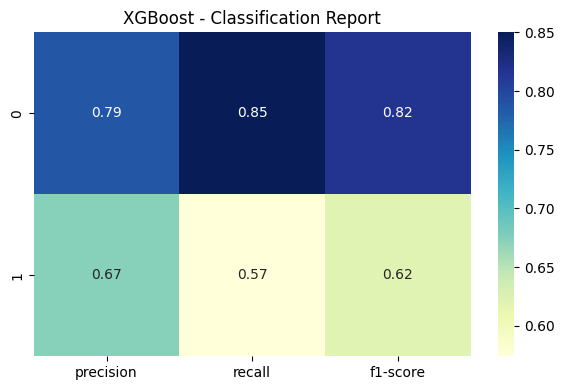


 Confusion matrix for best model (XGB) 
 (0.7532467532467533, 0.6948051948051948, 0.7532467532467533) (np.float64(0.8325925925925926), np.float64(0.6414814814814815), np.float64(0.8109259259259259)) [[85 15]
 [23 31]]               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



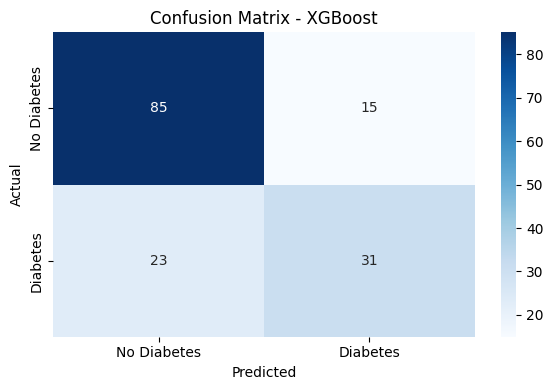

In [5]:
# Model Development
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50, random_state=42)
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)

# Evaluate on test set
preds = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]
log_preds = log_model.predict(X_test)
tree_preds = tree_model.predict(X_test)

log_acc = accuracy_score(y_test, log_preds)
tree_acc = accuracy_score(y_test, tree_preds)
xgb_acc = accuracy_score(y_test, preds)

log_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
tree_auc = roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("XGB Classification Report:\n", classification_report(y_test, preds))
print("XGB ROC AUC Score:", xgb_auc)

print("Logistic Regression Classification Report:\n", classification_report(y_test, tree_preds))
print("Logistic Regression ROC AUC Score:", log_auc)

print("Decision Tree Classification Report:\n", classification_report(y_test, preds))
print("Decision Tree ROC AUC Score:", tree_auc)

# Output model evaluation summary
{
    "Logistic AUC": round(log_auc, 3),
    "Decision Tree AUC": round(tree_auc, 3),
    "XGBoost AUC": round(xgb_auc, 3),
    "Best Model": "XGBoost"
}

# Confusion matrix for best model (XGB)
conf_matrix = confusion_matrix(y_test, preds)
classification_rep = classification_report(y_test, preds)

log_report = classification_report(y_test, log_preds, output_dict=True)
dtree_report = classification_report(y_test, tree_preds, output_dict=True)
xgb_report = classification_report(y_test, preds, output_dict=True)

# Plot function
def plot_classification_report(report_dict, title):
    df_report = pd.DataFrame(report_dict).T
    df_report = df_report.iloc[:-3]  # remove accuracy/macro/weighted
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_report[['precision', 'recall', 'f1-score']].astype(float), annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot for each model
plot_classification_report(log_report, "Logistic Regression - Classification Report")
plot_classification_report(dtree_report, "Decision Tree - Classification Report")
plot_classification_report(xgb_report, "XGBoost - Classification Report")

print("\n Confusion matrix for best model (XGB) \n",(log_acc, tree_acc, xgb_acc), (log_auc, tree_auc, xgb_auc), conf_matrix, classification_rep)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

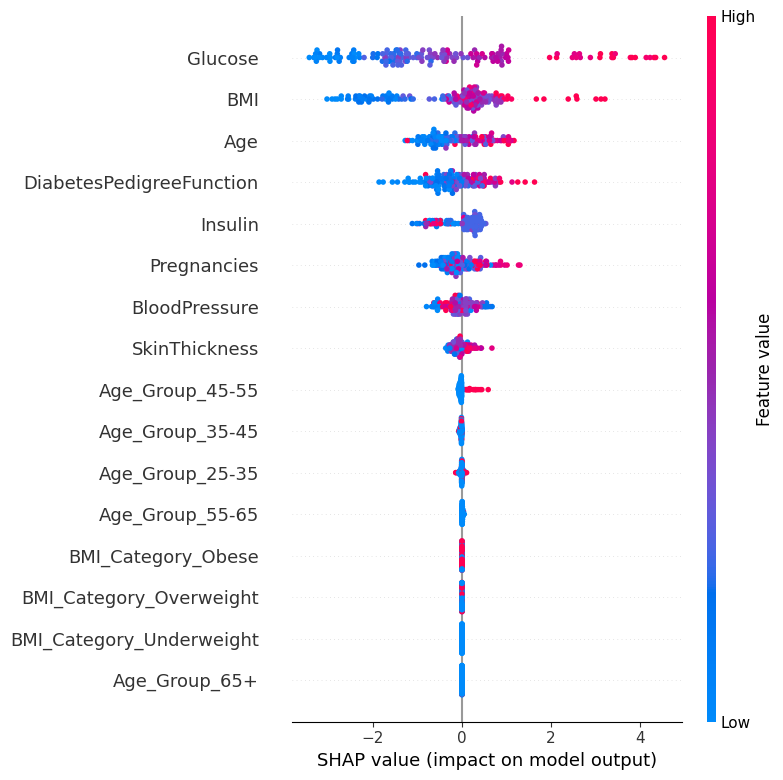

In [6]:
import shap
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

# SHAP summary plot
shap.summary_plot(shap_values, features=X_test, feature_names=X.columns)

In [7]:
# Model Deployment
import joblib
import numpy as np

# Save model and scaler
joblib.dump(model, "diabetes_xgb_model.joblib")
joblib.dump(scaler, "diabetes_scaler.joblib")

print(df_encoded.drop("Outcome", axis=1).columns)

# Simulate real-time prediction
sample = np.array([[2, 120, 70, 25, 80, 30.5, 0.4, 33, 0, 1, 0, 1, 0, 0, 0, 0]])
#sample = df_encoded.drop("Outcome", axis=1).iloc[0].values.reshape(1, -1)

scaled = scaler.transform(sample)
pred = model.predict(scaled)
proba = model.predict_proba(scaled)[0][1]

print("Prediction (1=Diabetic):", int(pred[0]))
print("Probability of Diabetes:", round(proba, 3))


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Category_Obese',
       'BMI_Category_Overweight', 'BMI_Category_Underweight',
       'Age_Group_25-35', 'Age_Group_35-45', 'Age_Group_45-55',
       'Age_Group_55-65', 'Age_Group_65+'],
      dtype='object')
Prediction (1=Diabetic): 1
Probability of Diabetes: 0.984


✅ Model performance acceptable. No retraining needed.


/tmp/ipython-input-162460992.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


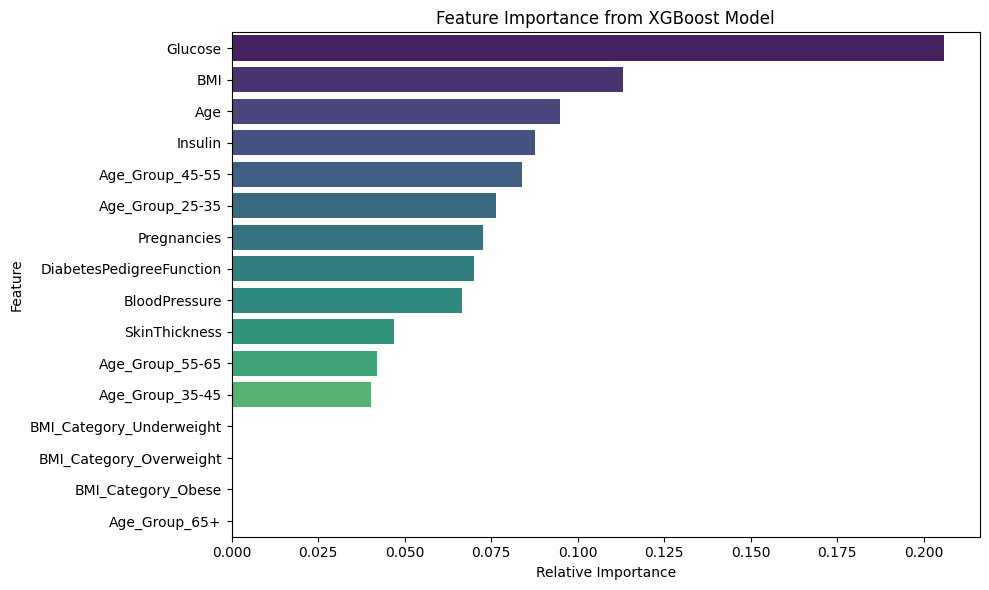

,Feature,Importance
1,Glucose,0.205913
5,BMI,0.113049
7,Age,0.094941
4,Insulin,0.087550
13,Age_Group_45-55,0.083903


In [8]:
# Monitoring & Retraining

# Simulated logic: trigger retraining if test accuracy drops or data drifts
from sklearn.metrics import accuracy_score

# Evaluate current model
current_acc = accuracy_score(y_test, model.predict(X_test))

# Define retraining threshold
if current_acc < 0.70:
    print("⚠️ Accuracy dropped! Retraining model...")
    model.fit(X_scaled, y)  # retrain with entire data
    joblib.dump(model, "diabetes_xgb_model_retrained.joblib")
else:
    print("✅ Model performance acceptable. No retraining needed.")

    import matplotlib.pyplot as plt
import seaborn as sns

# Step : Feature Importance

# Get feature importance from the XGBoost model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance from XGBoost Model")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Return top drivers
importance_df.head(5)


In [9]:
# Model Deployment

# Fast API and Deployment
!pip install fastapi uvicorn pyngrok nest-asyncio joblib scikit-learn xgboost

from pyngrok import ngrok
import nest_asyncio
nest_asyncio.apply()




In [10]:
%%writefile app.py
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import joblib
from fastapi.middleware.cors import CORSMiddleware

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=['*'],
    allow_credentials=True,
    allow_methods=['*'],
    allow_headers=['*'],
)

model = joblib.load("diabetes_xgb_model.joblib")
scaler = joblib.load("diabetes_scaler.joblib")

class DiabetesInput(BaseModel):
    Pregnancies: int
    Glucose: float
    BloodPressure: float
    SkinThickness: float
    Insulin: float
    BMI: float
    DiabetesPedigreeFunction: float
    Age: int
    BMI_Category_Obese: int
    BMI_Category_Overweight: int
    BMI_Category_Underweight: int
    Age_Group_25_35: int
    Age_Group_35_45: int
    Age_Group_45_55: int
    Age_Group_55_65: int
    Age_Group_65_plus: int

@app.post("/predict")
def predict_diabetes(data: DiabetesInput):
    input_data = np.array([
        data.Pregnancies, data.Glucose, data.BloodPressure, data.SkinThickness,
        data.Insulin, data.BMI, data.DiabetesPedigreeFunction, data.Age,
        data.BMI_Category_Obese, data.BMI_Category_Overweight, data.BMI_Category_Underweight,
        data.Age_Group_25_35, data.Age_Group_35_45, data.Age_Group_45_55,
        data.Age_Group_55_65, data.Age_Group_65_plus
    ]).reshape(1, -1)

    scaled_input = scaler.transform(input_data)
    prediction = model.predict(scaled_input)[0]
    probability = model.predict_proba(scaled_input)[0][1]

    return {
        "prediction": int(prediction),
        "probability": round(probability, 4)
    }


Writing app.py


In [11]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn
nest_asyncio.apply()

# Set your ngrok authtoken here. Replace 'YOUR_AUTHTOKEN' with your actual authtoken.
# You can get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
ngrok.set_auth_token("2ygy0SzVFjg8UhimAEBKkEMGAlQ_6jsebJKvJbUbBhsKoyLXL")


#!uvicorn app:app --host 0.0.0.0 --port 8000 &

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

#ngrok config add-authtoken 2ygy0SzVFjg8UhimAEBKkEMGAlQ_6jsebJKvJbUbBhsKoyLXL

# Expose the app using ngrok
#public_url = ngrok.connect(addr=8000)
print(f"🚀 Your FastAPI app is live at: {public_url}/docs")


Public URL: https://c70787532bd8.ngrok-free.app


NameError: name 'app' is not defined